In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
#import processed data
df = pd.read_csv('E:\Projects\canadacharities\data\interim\charity_data.csv')

## Class distribution

What is the revoked/registered split?

In [4]:
df2 = df.reset_index().groupby('Status').size().to_frame('count')
df2['percentage'] = round(df2['count'] / len(df), 3)
print (df2)

            count  percentage
Status                       
Registered  72252       0.983
Revoked      1239       0.017


<b>Less than 2% of 73.5K charities who filed information with CRA in 2018 fiscal year had their charity status revoked between 2018-2020.</b>

## Plotting

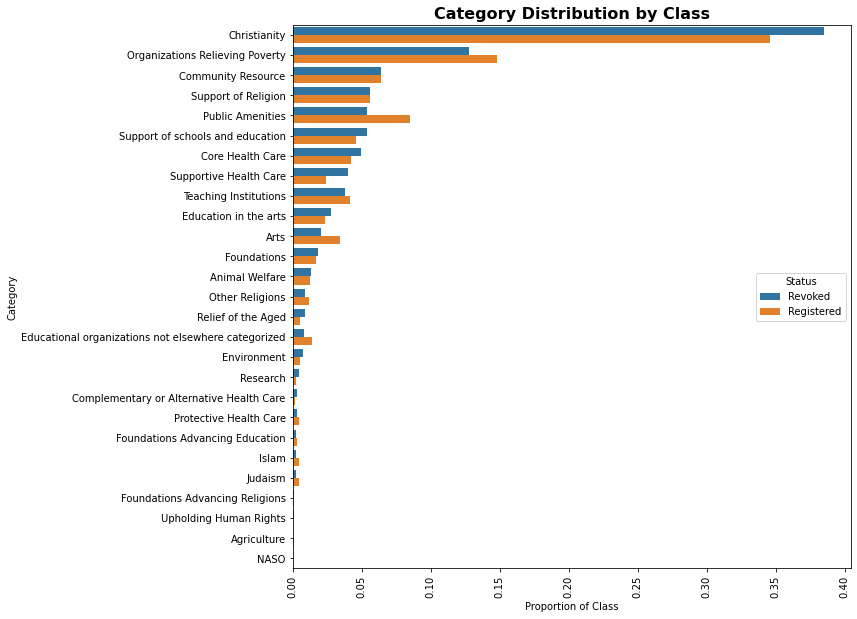

In [5]:
plt.figure(figsize=[10,10])
cat_df = df.groupby(['Status','Category'])['BN/Registration Number'].agg(['count'])
cat_df['category_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
cat_df = cat_df['category_perc'].reset_index().sort_values(['Status', 'category_perc'], ascending=False)

sns.barplot(x='category_perc', y='Category', hue='Status', data=cat_df)
plt.xticks(rotation=90)
plt.ylabel('Category')
plt.xlabel('Proportion of Class')
plt.title('Category Distribution by Class', fontsize = 16, fontweight='bold')
plt.show();

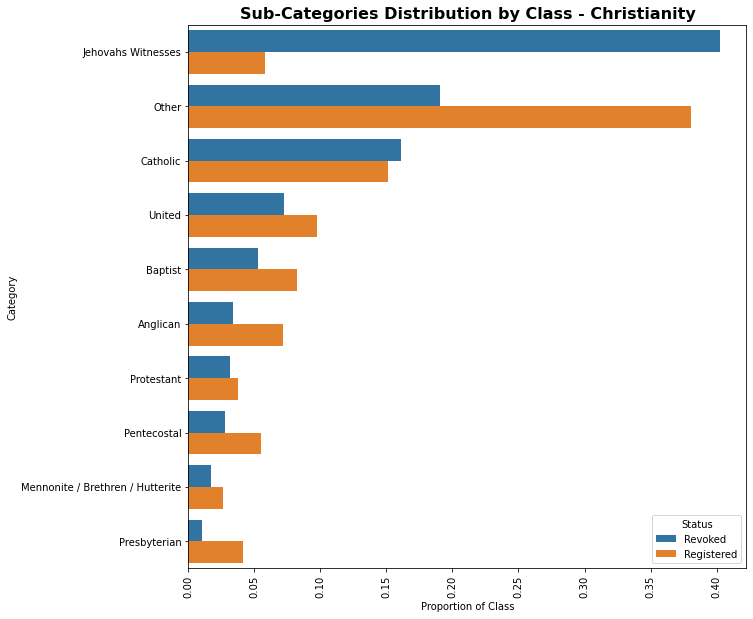

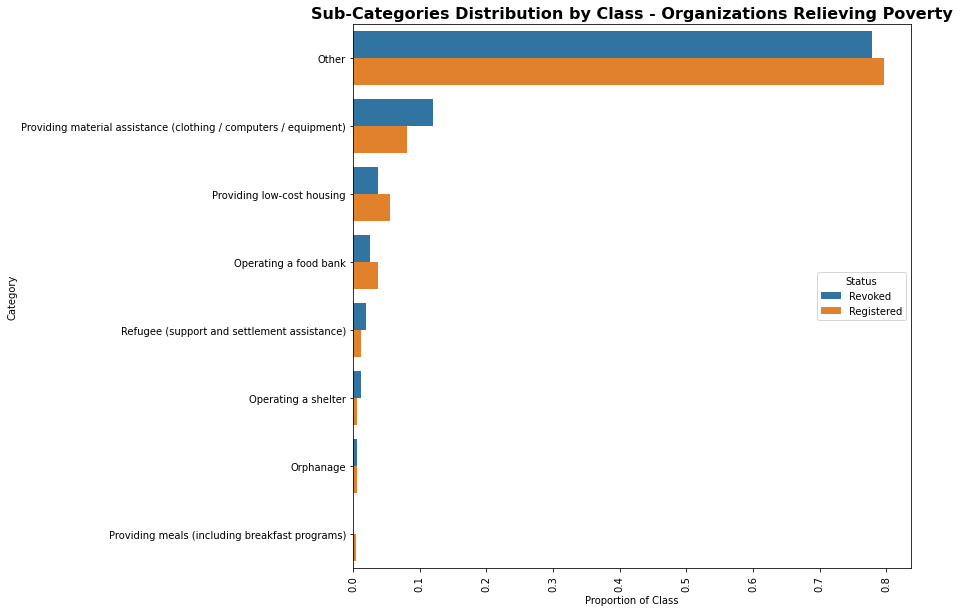

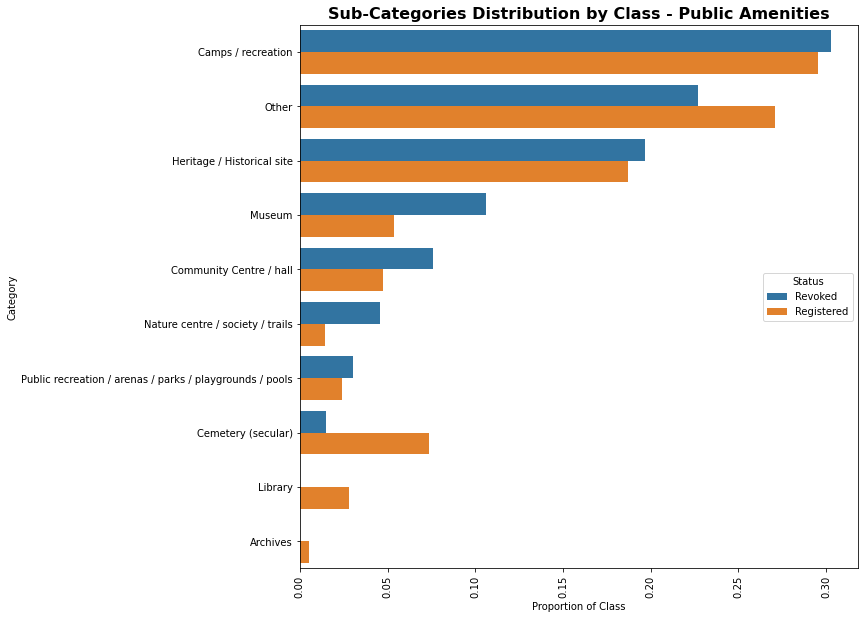

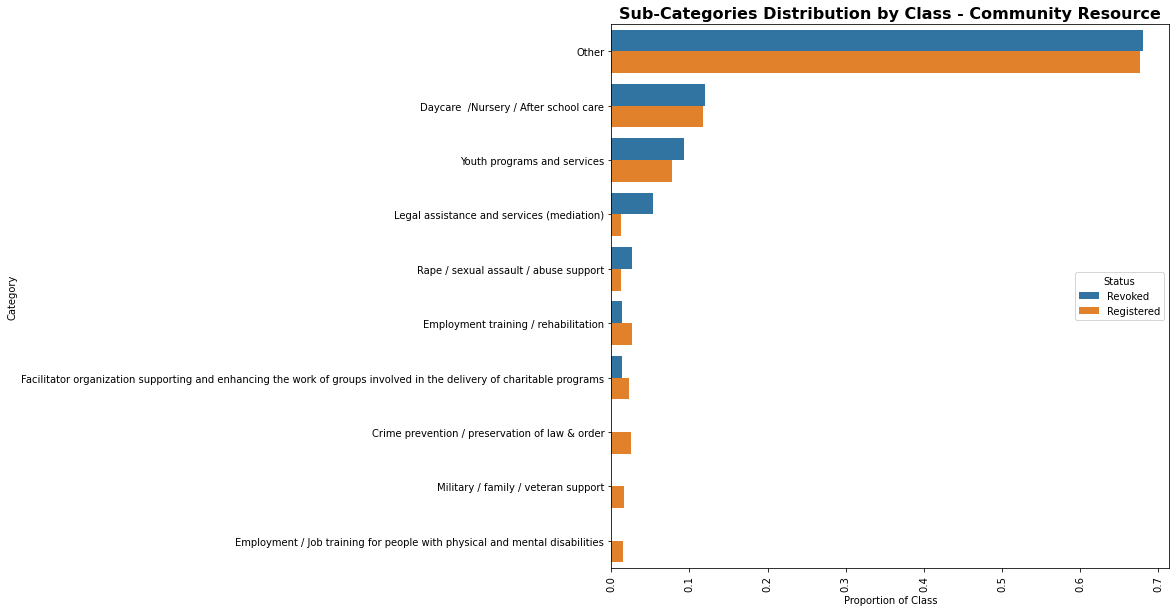

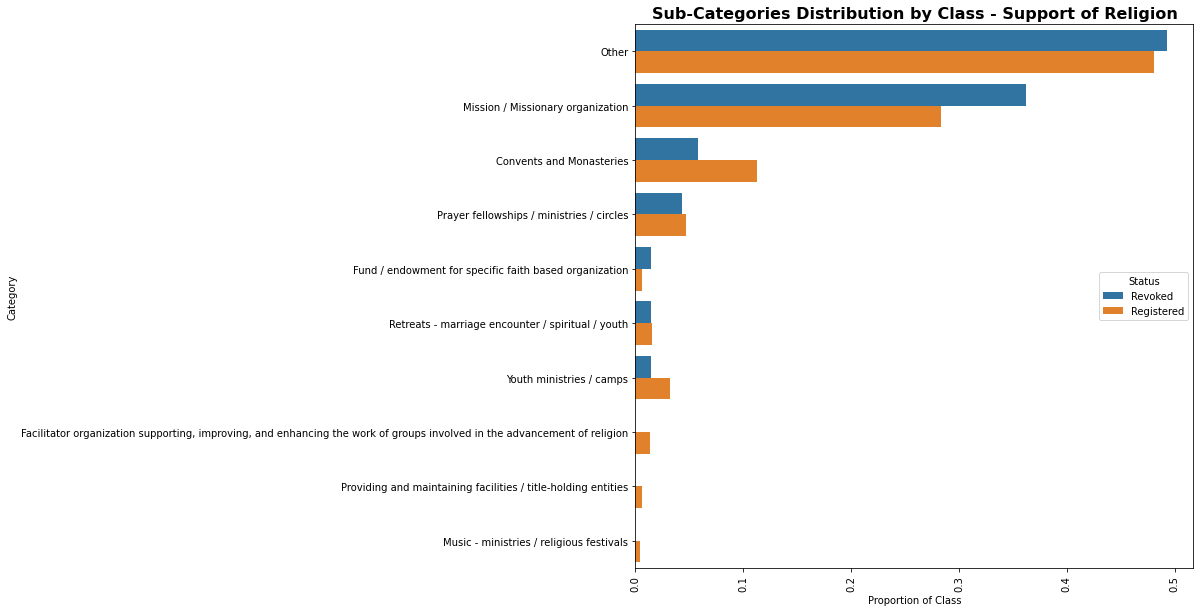

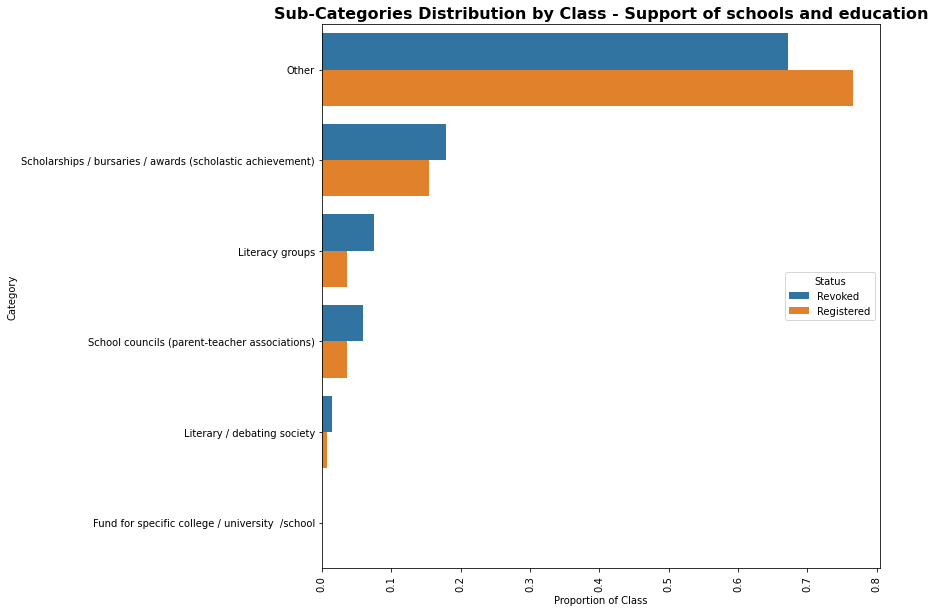

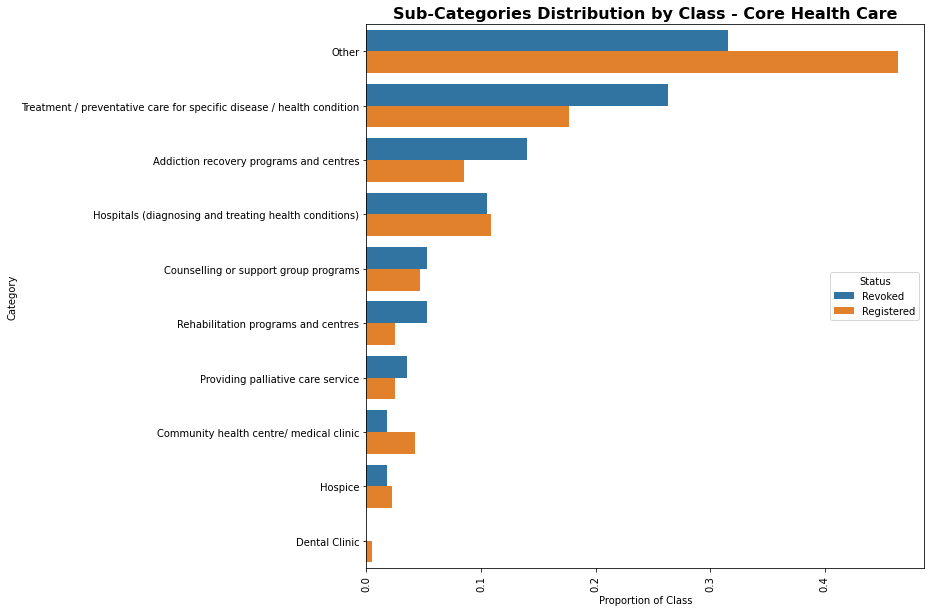

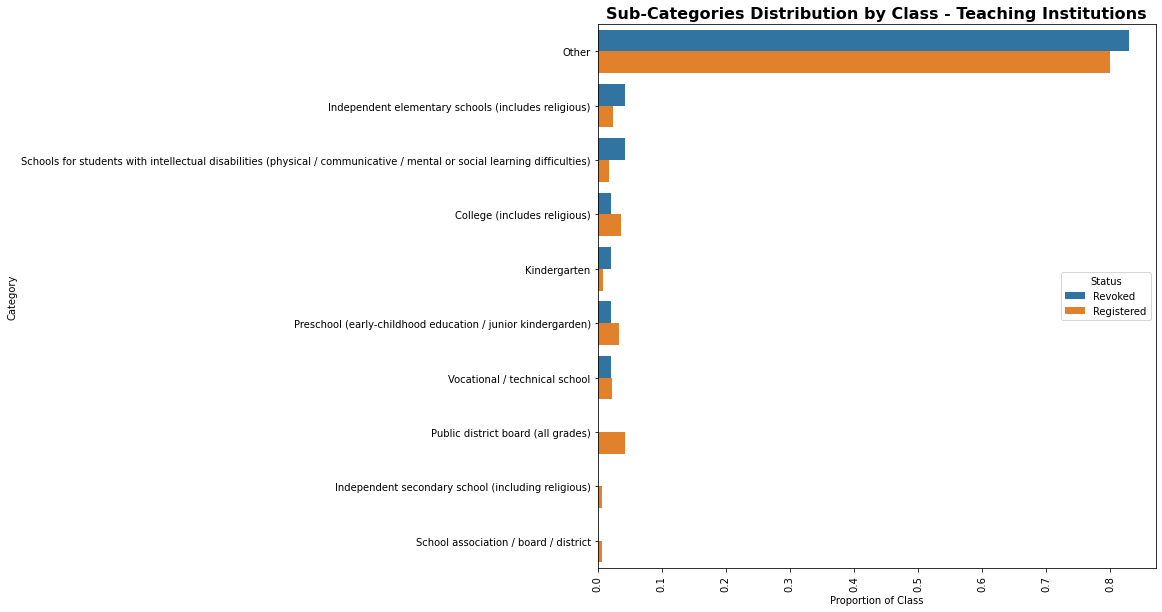

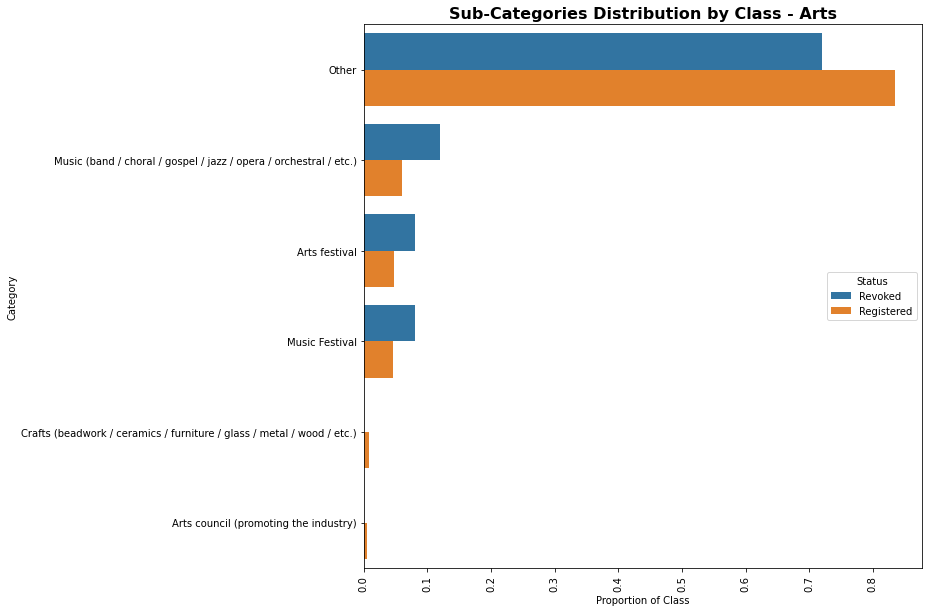

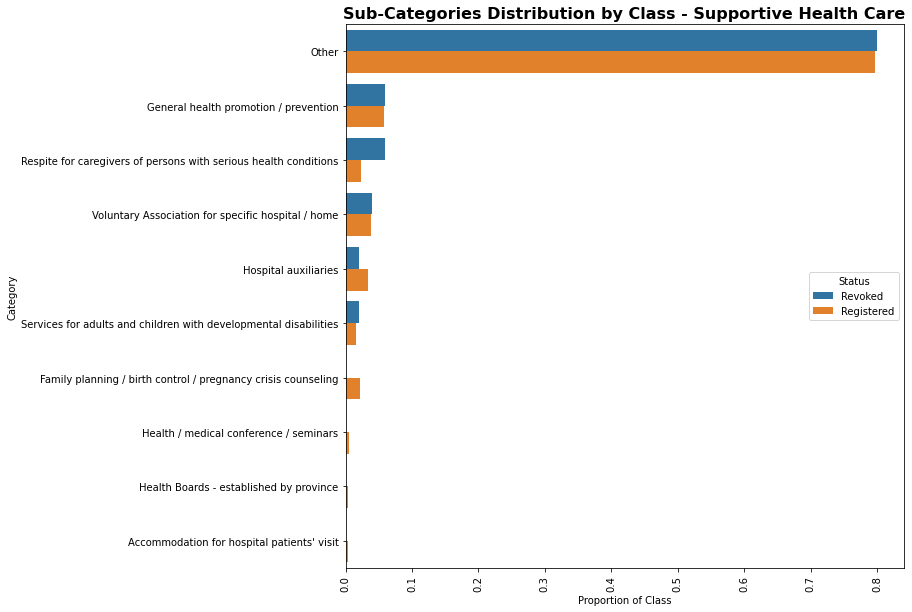

In [6]:
top_categories = df['Category'].value_counts(dropna=False)[:10].index.tolist()

for category in top_categories:
    cat_df = df.loc[df['Category']==category, :] #filter for category data
    top_subcategories = cat_df['Sub-Category'].value_counts(dropna=False)[:10].index.tolist()
    cat_df = cat_df.loc[cat_df['Sub-Category'].isin(top_subcategories), :]
    
    plt.figure(figsize=[10,10])
    cat_df = cat_df.groupby(['Status','Sub-Category'])['BN/Registration Number'].agg(['count'])
    cat_df['subcategory_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
    cat_df = cat_df['subcategory_perc'].reset_index().sort_values(['Status', 'subcategory_perc'], ascending=False)

    sns.barplot(x='subcategory_perc', y='Sub-Category', hue='Status', data=cat_df)
    plt.xticks(rotation=90)
    plt.ylabel('Category')
    plt.xlabel('Proportion of Class')
    plt.title('Sub-Categories Distribution by Class - {}'.format(category), fontsize = 16, fontweight='bold')
    plt.show();

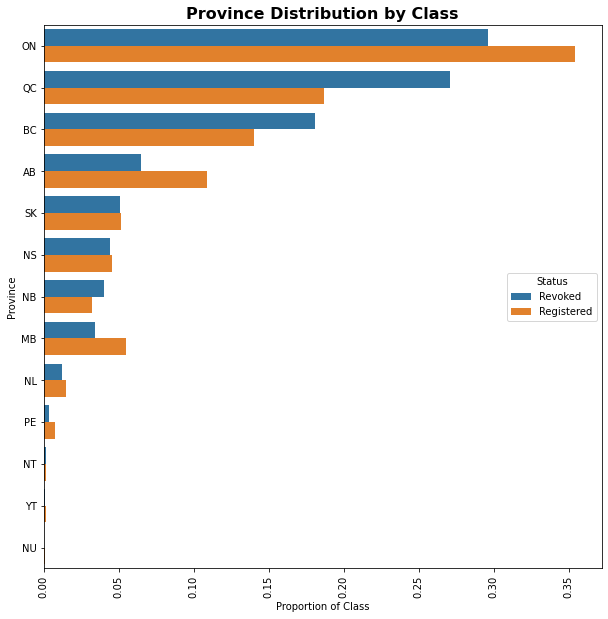

In [7]:
plt.figure(figsize=[10,10])
canada_provinces = ['ON', 'QC', 'BC', 'AB', 'SK', 'NS', 'NB', 'MB', 'NL', 'PE', 'NT', 'YT', 'NU']

#filter for Canada provinced
cat_df = df.loc[df['Province'].isin(canada_provinces), :]

cat_df = cat_df.groupby(['Status','Province'])['BN/Registration Number'].agg(['count'])
cat_df['category_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
cat_df = cat_df['category_perc'].reset_index().sort_values(['Status', 'category_perc'], ascending=False)

sns.barplot(x='category_perc', y='Province', hue='Status', data=cat_df)
plt.xticks(rotation=90)
plt.ylabel('Province')
plt.xlabel('Proportion of Class')
plt.title('Province Distribution by Class', fontsize = 16, fontweight='bold')
plt.show();

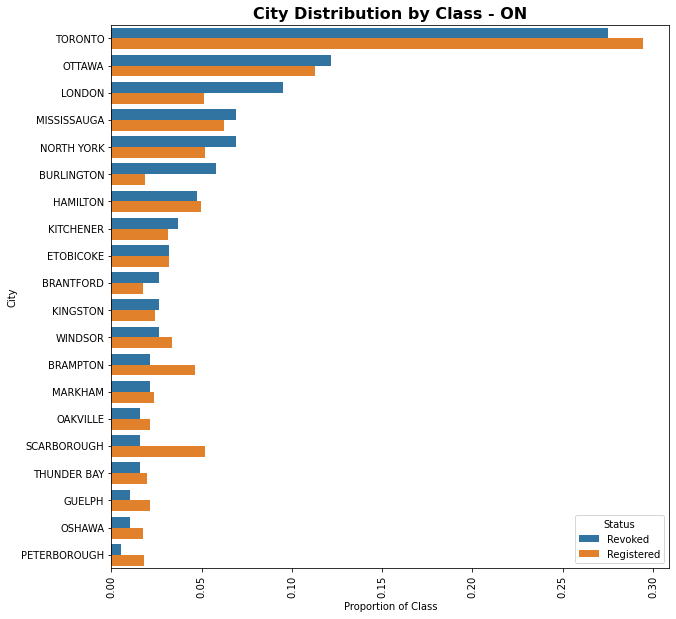

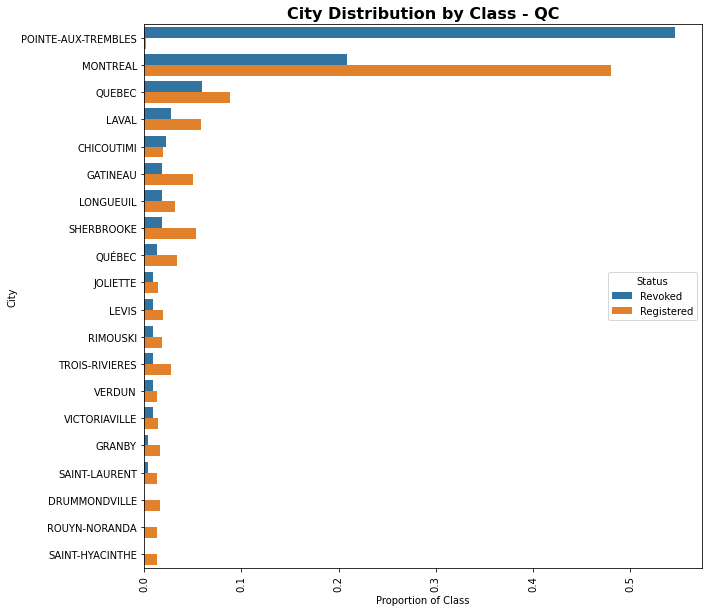

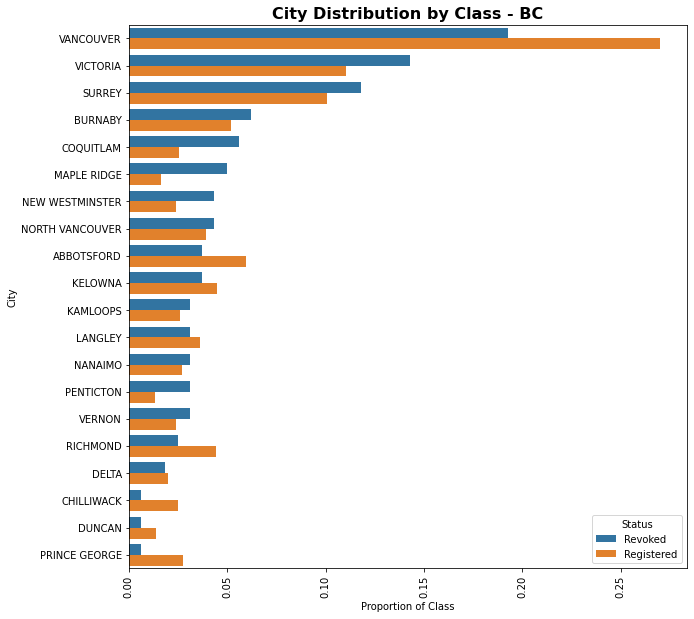

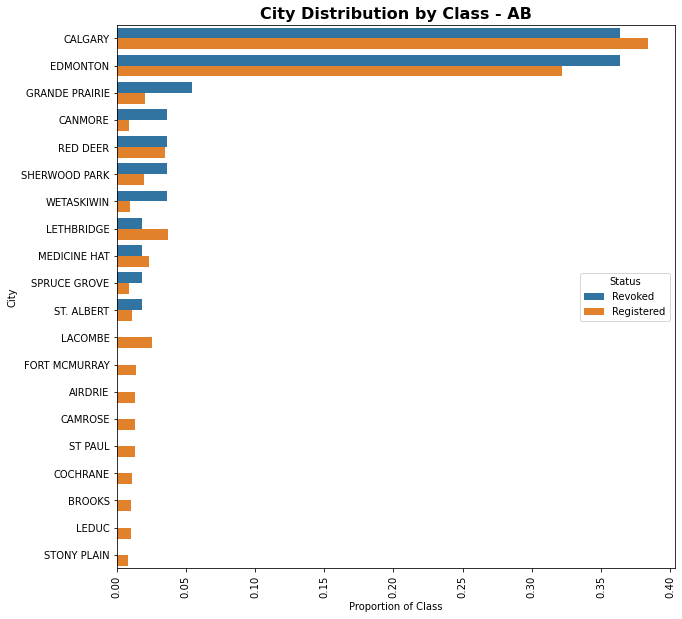

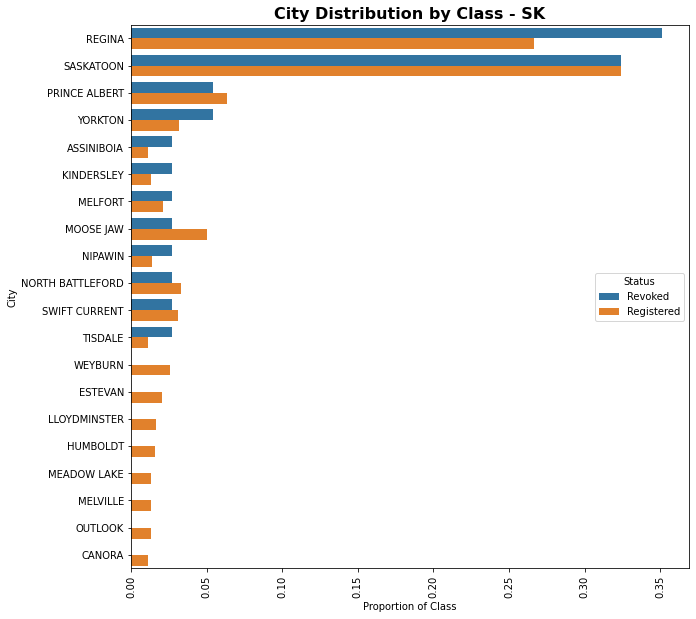

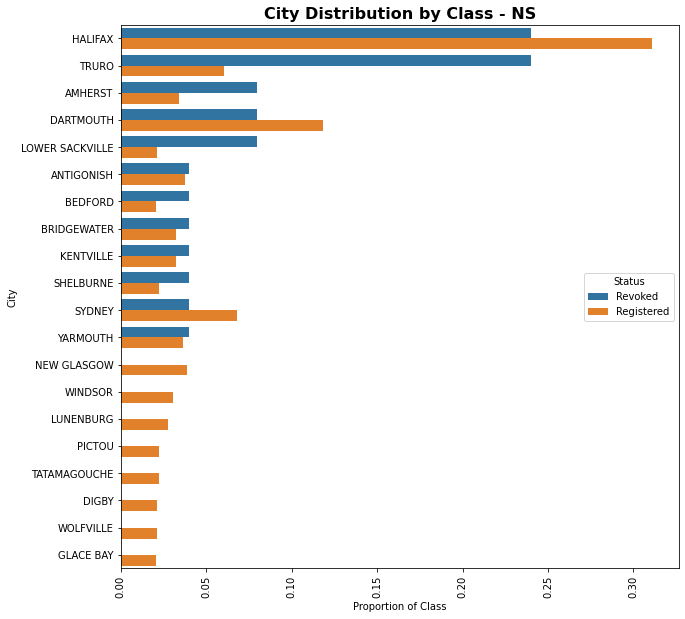

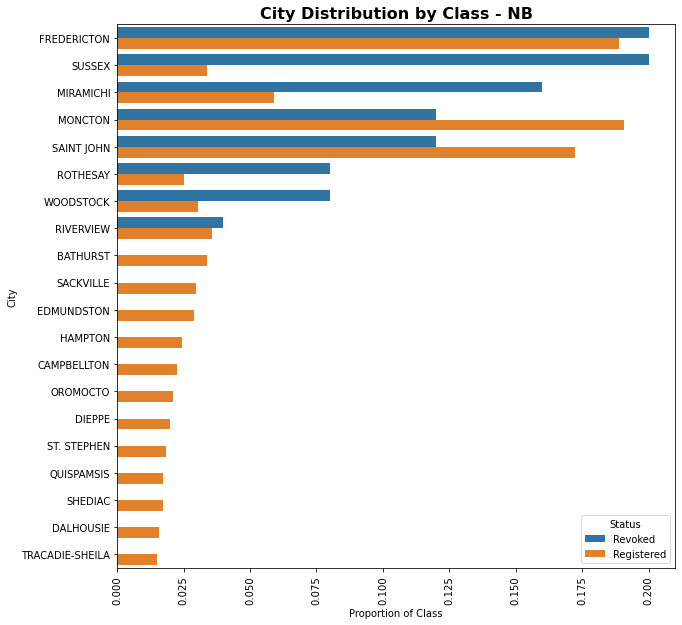

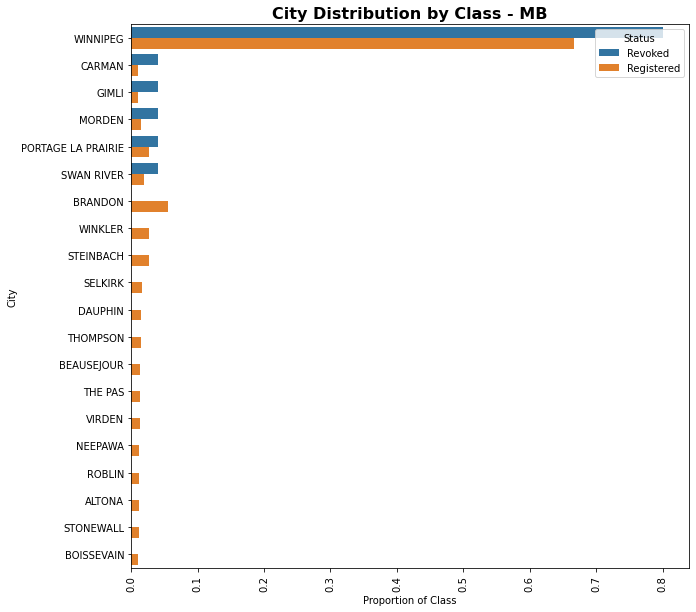

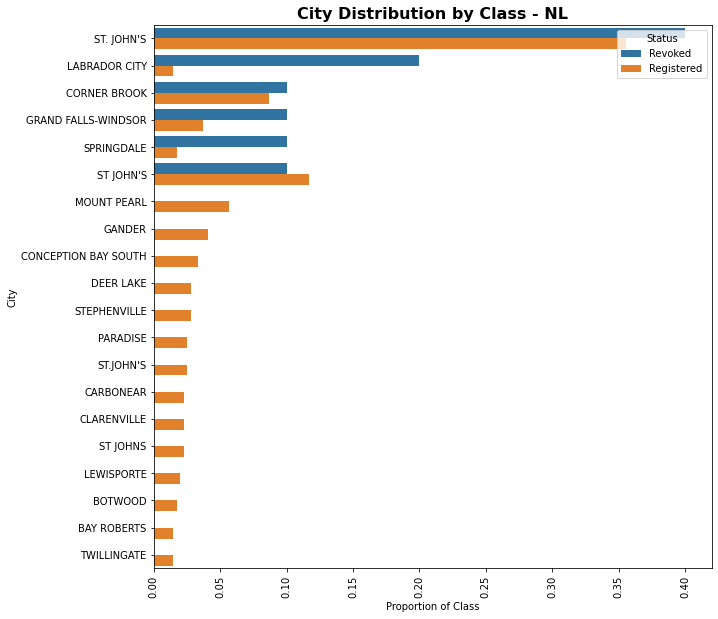

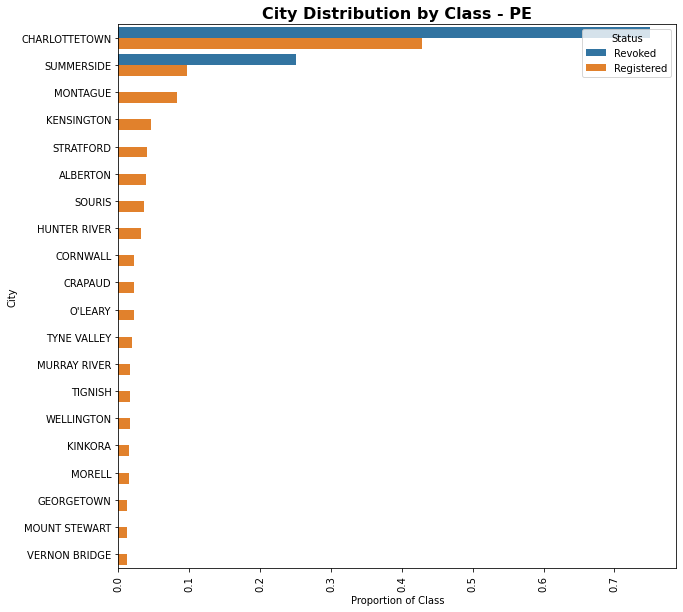

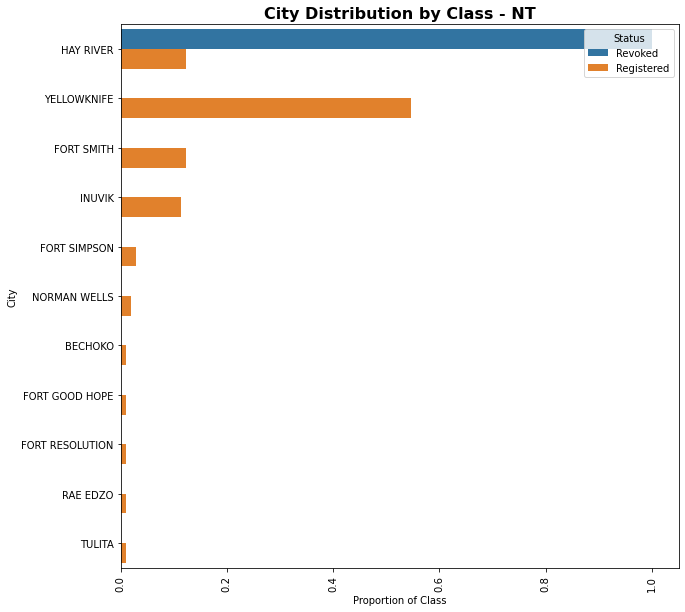

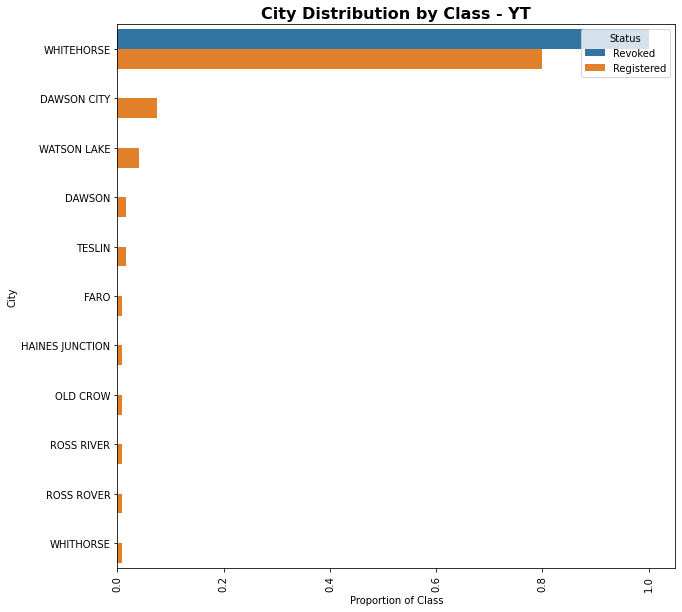

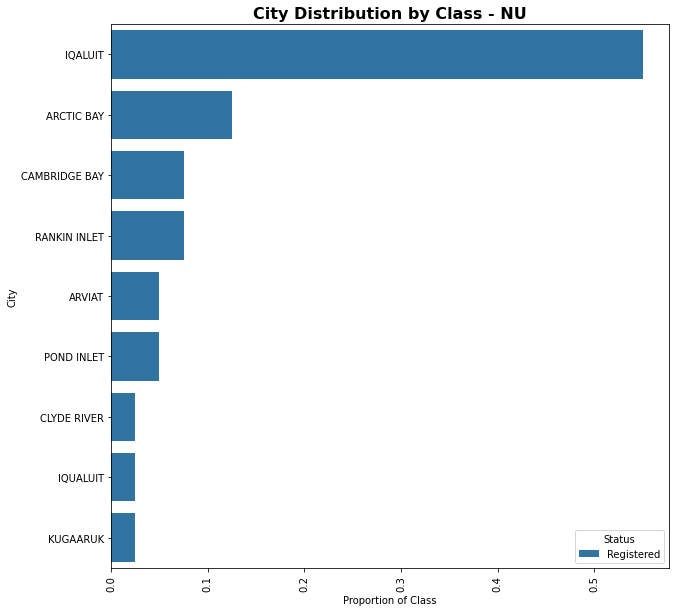

In [8]:
for province in canada_provinces:
    cat_df = df.loc[df['Province'] == province, :] #filter for province data
    top_cities = cat_df['City'].value_counts(dropna=False)[:20].index.tolist()
    cat_df = cat_df.loc[cat_df['City'].isin(top_cities), :]
    
    plt.figure(figsize=[10,10])
    cat_df = cat_df.groupby(['Status','City'])['BN/Registration Number'].agg(['count'])
    cat_df['subcategory_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
    cat_df = cat_df['subcategory_perc'].reset_index().sort_values(['Status', 'subcategory_perc'], ascending=False)

    sns.barplot(x='subcategory_perc', y='City', hue='Status', data=cat_df)
    plt.xticks(rotation=90)
    plt.ylabel('City')
    plt.xlabel('Proportion of Class')
    plt.title('City Distribution by Class - {}'.format(province), fontsize = 16, fontweight='bold')
    plt.show();

#### Program Areas

<ipython-input-9-32ea7ac1b4af>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cat_df = cat_df[df['1200 Program Area']!='(Free-form text)'] #removing free-form text responses for easy comparison


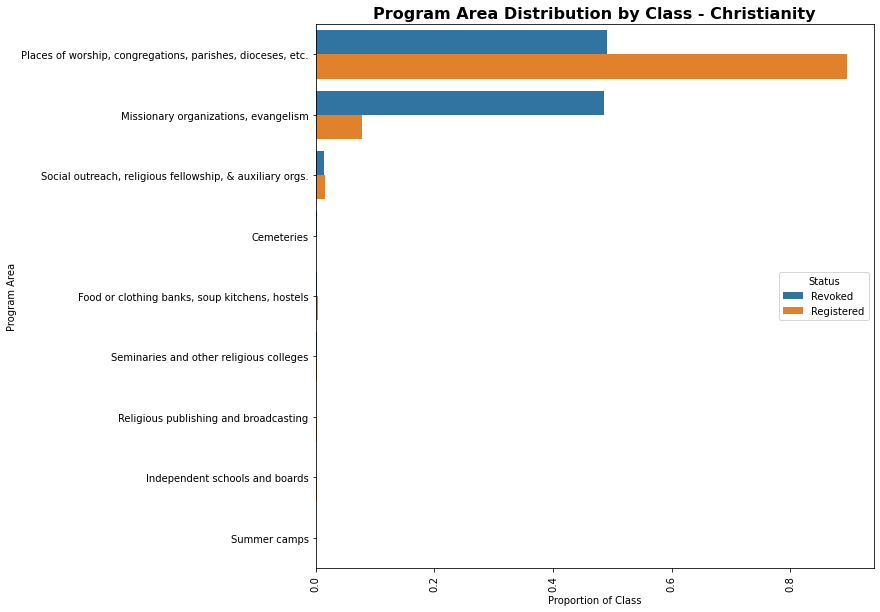

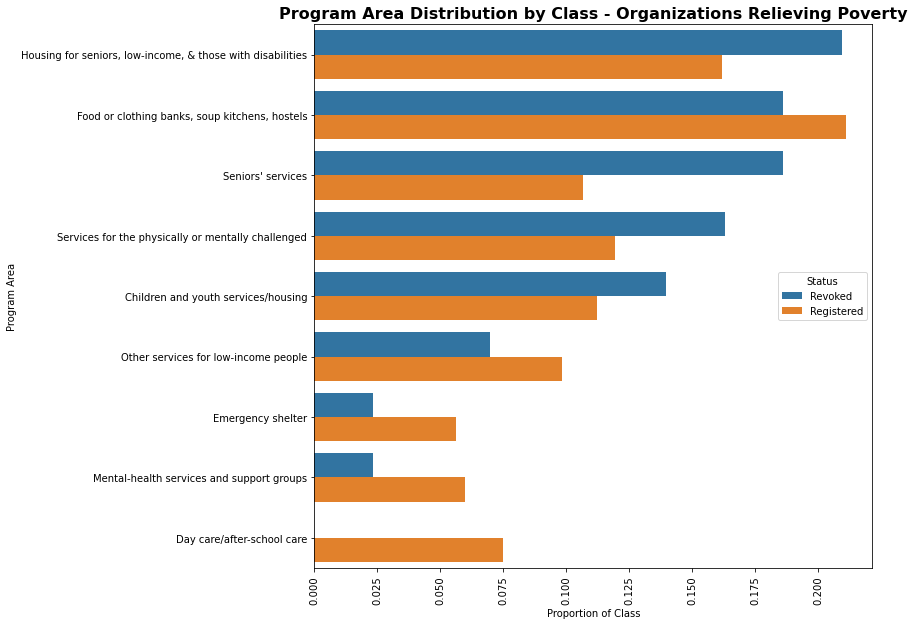

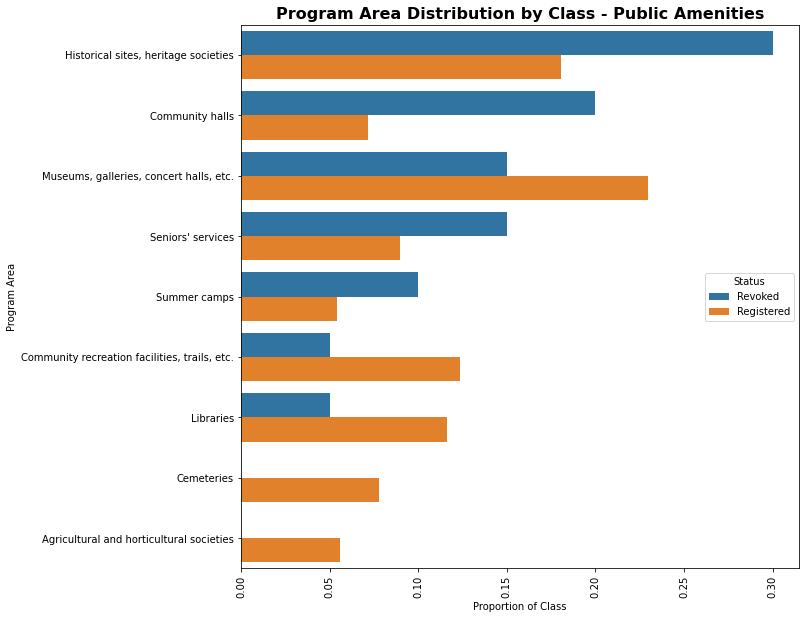

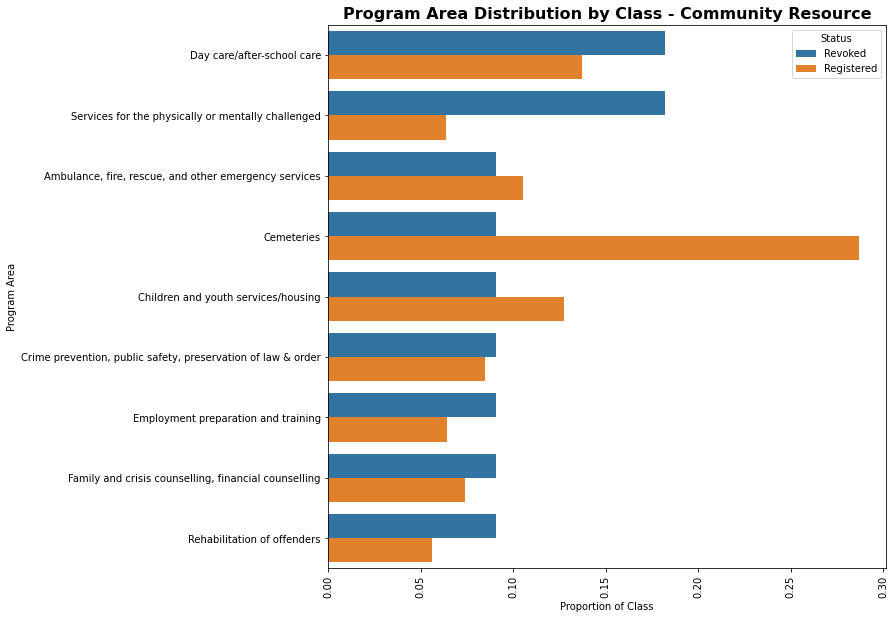

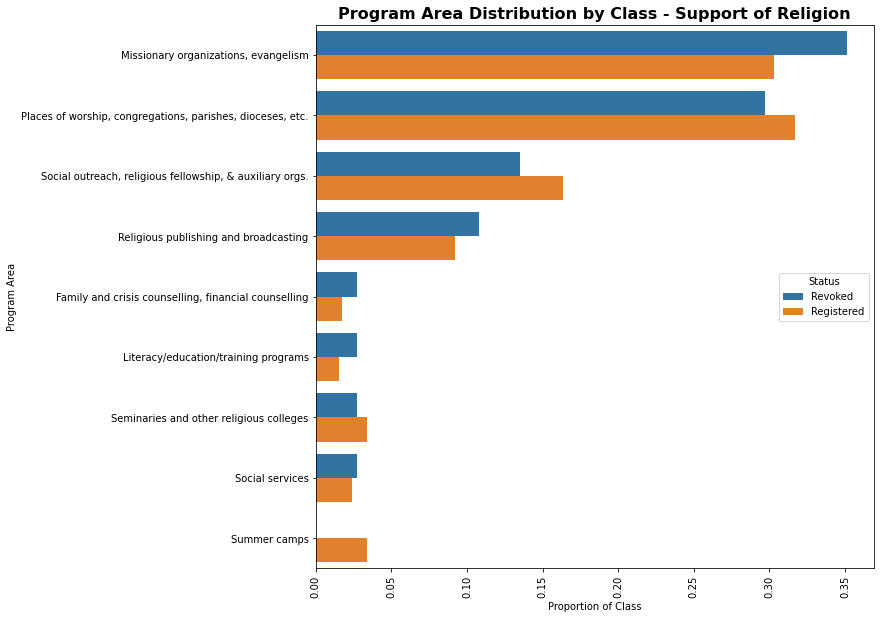

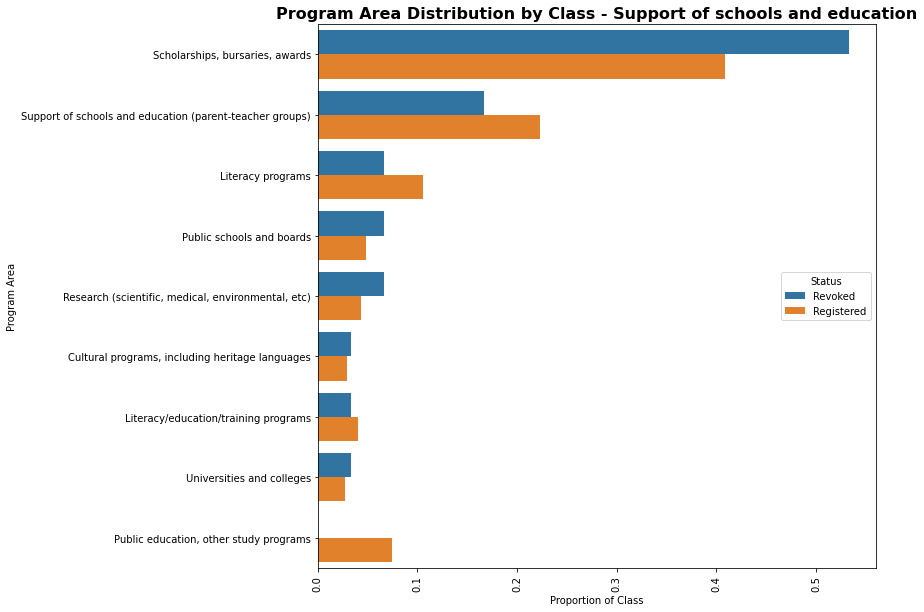

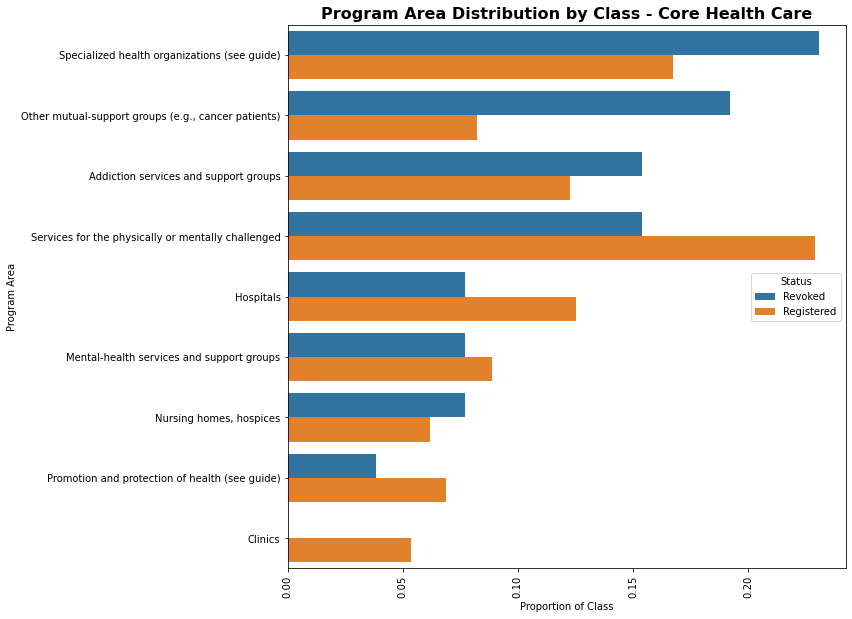

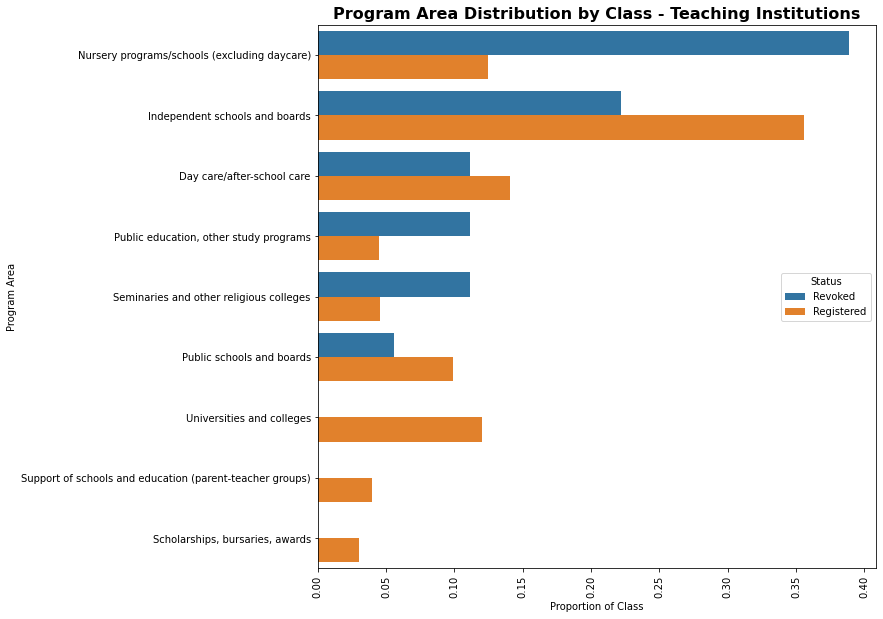

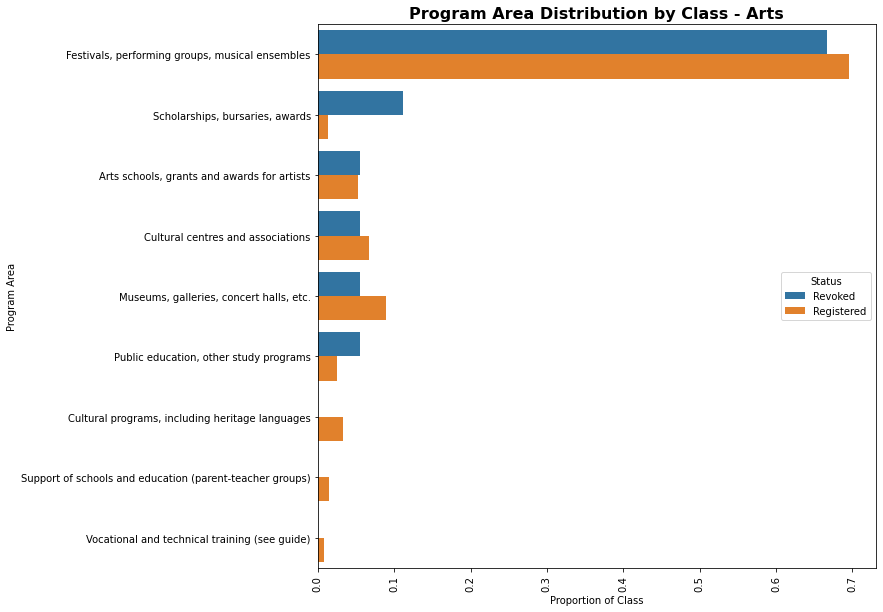

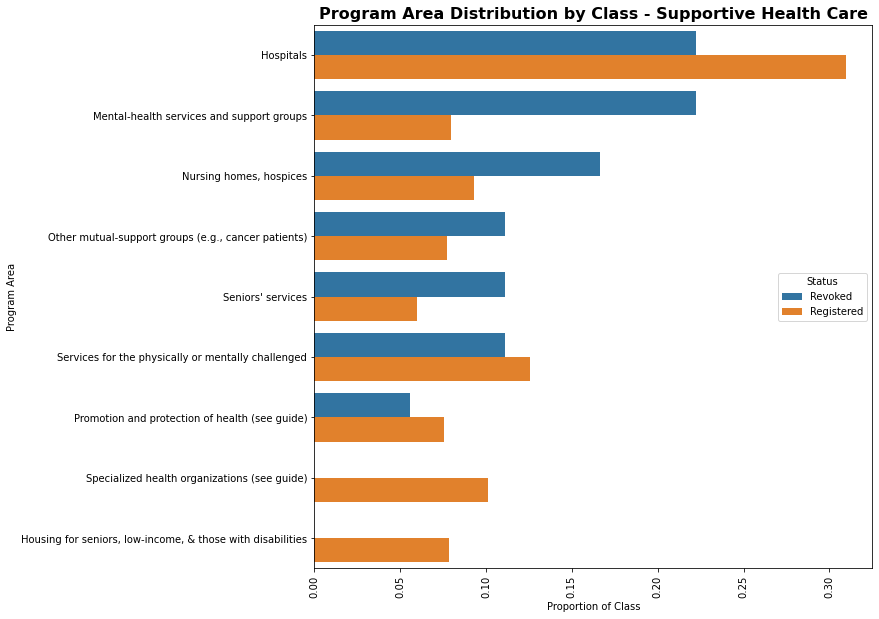

In [9]:
top_categories = df['Category'].value_counts(dropna=False)[:10].index.tolist()

for category in top_categories:
    cat_df = df.loc[df['Category']==category, :] #filter for category data
    cat_df = cat_df[df['1200 Program Area']!='(Free-form text)'] #removing free-form text responses for easy comparison
    top_program_areas = cat_df['1200 Program Area'].value_counts(dropna=False)[:10].index.tolist()
    cat_df = cat_df.loc[cat_df['1200 Program Area'].isin(top_program_areas), :]
    
    plt.figure(figsize=[10,10])
    cat_df = cat_df.groupby(['Status','1200 Program Area'])['BN/Registration Number'].agg(['count'])
    cat_df['subcategory_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
    cat_df = cat_df['subcategory_perc'].reset_index().sort_values(['Status', 'subcategory_perc'], ascending=False)

    sns.barplot(x='subcategory_perc', y='1200 Program Area', hue='Status', data=cat_df)
    plt.xticks(rotation=90)
    plt.ylabel('Program Area')
    plt.xlabel('Proportion of Class')
    plt.title('Program Area Distribution by Class - {}'.format(category), fontsize = 16, fontweight='bold')
    plt.show();

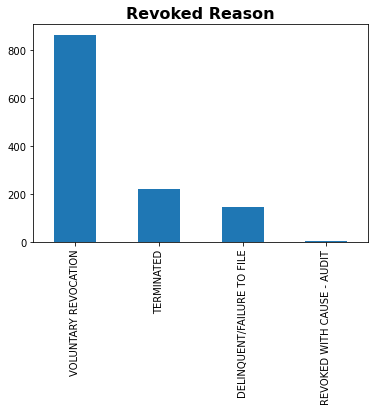

In [10]:
df.loc[df['Revoked Reason'].notnull(), 'Revoked Reason'].value_counts(dropna=False).plot(kind='bar')
plt.title('Revoked Reason', fontsize = 16, fontweight='bold')
plt.show()

## Financial Info

### Revenue

In [73]:
#filter on revenue data
revenue_cols = [col for col in df.columns if '_perc_revenue' in col] + ['Status']
#make data from wide to long using category column
revenue_data = df[revenue_cols]

In [ ]:
#plot distributions

In [146]:
data_dic = pd.read_csv(r'E:\Projects\canadacharities\data\external\data_dictionary.csv')

In [10]:
'''
def removeOutliers(data, thresholdStd = 3):
    """
    This method returns all value indices which are farther away
    than thresholdStd standard deviationa
    """
    not_outliers = []
    mean = np.mean(data)
    std = np.std(data)
    if std == 0:
        return data
    
    for i, y in enumerate(data):
        z_score = (y - mean) / std
        if np.abs(z_score) <= thresholdStd:
            not_outliers.append(i)
    return not_outliers
'''

In [158]:
revenue_data

,4500_perc_revenue,5610_perc_revenue,4505_perc_revenue,4510_perc_revenue,4530_perc_revenue,4540_perc_revenue,4550_perc_revenue,4560_perc_revenue,4570_perc_revenue,4571_perc_revenue,...,4580_perc_revenue,4590_perc_revenue,4600_perc_revenue,4610_perc_revenue,4620_perc_revenue,4630_perc_revenue,4640_perc_revenue,4650_perc_revenue,Status,all
0,0.019903,NaN,NaN,NaN,NaN,NaN,0.450944,NaN,NaN,NaN,...,0.002589,NaN,NaN,0.008989,0.333066,NaN,0.034252,0.150256,Registered,
1,0.002883,NaN,NaN,NaN,NaN,NaN,0.373311,NaN,NaN,NaN,...,NaN,NaN,NaN,0.033999,0.295718,NaN,0.270611,0.023478,Registered,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.941400,NaN,0.058600,Registered,
3,0.105720,NaN,NaN,0.083306,0.026612,0.011853,0.715689,0.037816,NaN,NaN,...,0.009039,NaN,NaN,NaN,NaN,0.002370,0.007595,NaN,Registered,
4,NaN,NaN,NaN,0.327218,0.044107,0.490345,0.133892,0.002327,NaN,NaN,...,0.002111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registered,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013726,NaN,NaN,0.986274,NaN,NaN,NaN,NaN,Registered,
73487,0.062438,NaN,NaN,NaN,0.009041,0.036318,NaN,0.155204,NaN,NaN,...,0.000495,NaN,NaN,NaN,0.001240,NaN,0.735265,NaN,Registered,
73488,0.743790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.256210,NaN,NaN,Registered,
73489,NaN,NaN,NaN,0.397896,0.010691,NaN,0.434122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.008897,0.010768,0.113390,0.024235,Registered,


In [162]:
revenue_data

,4500_perc_revenue,5610_perc_revenue,4505_perc_revenue,4510_perc_revenue,4530_perc_revenue,4540_perc_revenue,4550_perc_revenue,4560_perc_revenue,4570_perc_revenue,4571_perc_revenue,...,4580_perc_revenue,4590_perc_revenue,4600_perc_revenue,4610_perc_revenue,4620_perc_revenue,4630_perc_revenue,4640_perc_revenue,4650_perc_revenue,Status,all
0,0.019903,NaN,NaN,NaN,NaN,NaN,0.450944,NaN,NaN,NaN,...,0.002589,NaN,NaN,0.008989,0.333066,NaN,0.034252,0.150256,Registered,
1,0.002883,NaN,NaN,NaN,NaN,NaN,0.373311,NaN,NaN,NaN,...,NaN,NaN,NaN,0.033999,0.295718,NaN,0.270611,0.023478,Registered,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.941400,NaN,0.058600,Registered,
3,0.105720,NaN,NaN,0.083306,0.026612,0.011853,0.715689,0.037816,NaN,NaN,...,0.009039,NaN,NaN,NaN,NaN,0.002370,0.007595,NaN,Registered,
4,NaN,NaN,NaN,0.327218,0.044107,0.490345,0.133892,0.002327,NaN,NaN,...,0.002111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registered,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013726,NaN,NaN,0.986274,NaN,NaN,NaN,NaN,Registered,
73487,0.062438,NaN,NaN,NaN,0.009041,0.036318,NaN,0.155204,NaN,NaN,...,0.000495,NaN,NaN,NaN,0.001240,NaN,0.735265,NaN,Registered,
73488,0.743790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.256210,NaN,NaN,Registered,
73489,NaN,NaN,NaN,0.397896,0.010691,NaN,0.434122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.008897,0.010768,0.113390,0.024235,Registered,


In [198]:
#how many rows exceed 1 for each revenue type?
(revenue_data.select_dtypes(include='number') > 1).sum(axis=0)

4500_perc_revenue    232
5610_perc_revenue     17
4505_perc_revenue    128
4510_perc_revenue     33
4530_perc_revenue     51
4540_perc_revenue      8
4550_perc_revenue     16
4560_perc_revenue      1
4570_perc_revenue     22
4571_perc_revenue      5
4575_perc_revenue      8
4580_perc_revenue     81
4590_perc_revenue    254
4600_perc_revenue     29
4610_perc_revenue     13
4620_perc_revenue      6
4630_perc_revenue     41
4640_perc_revenue     34
4650_perc_revenue     79
dtype: int64

E:\Projects\canadacharities\envs\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


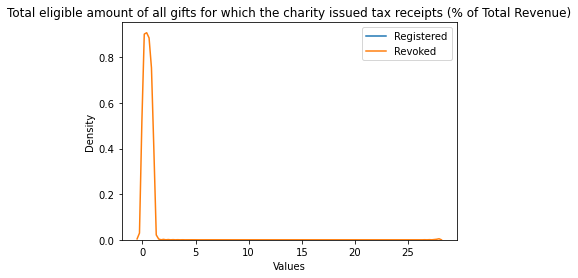

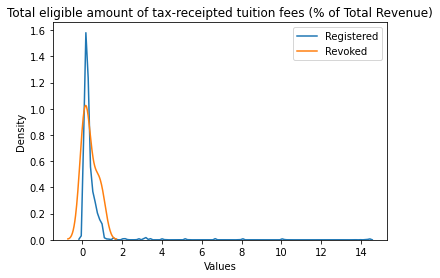

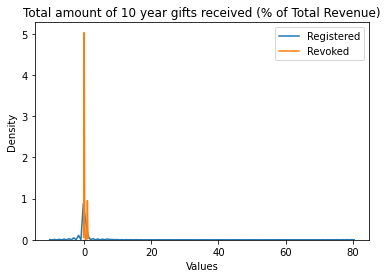

E:\Projects\canadacharities\envs\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


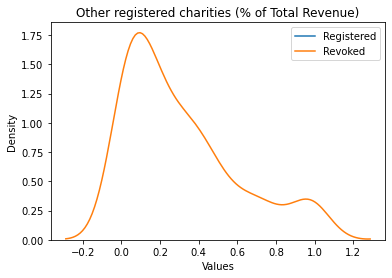

E:\Projects\canadacharities\envs\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


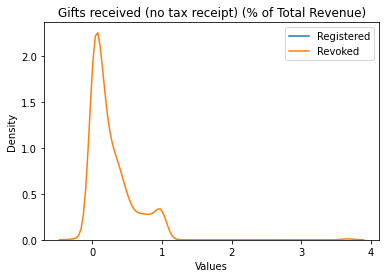

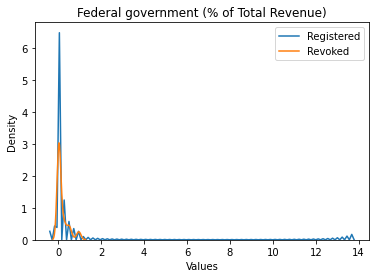

E:\Projects\canadacharities\envs\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


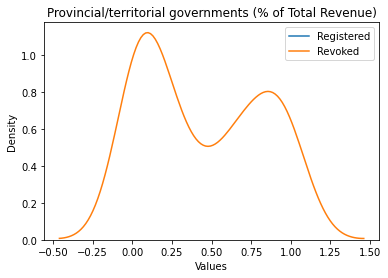

E:\Projects\canadacharities\envs\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


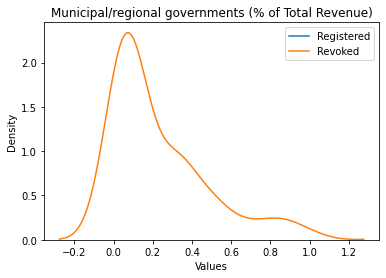

E:\Projects\canadacharities\envs\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


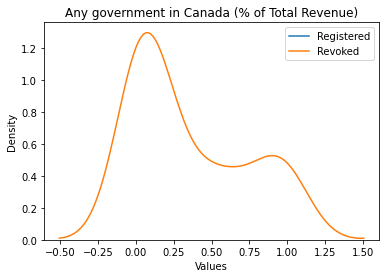

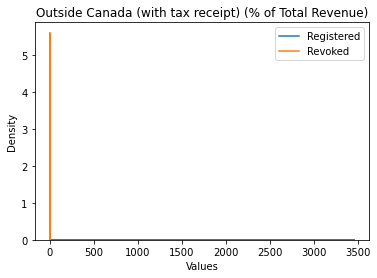

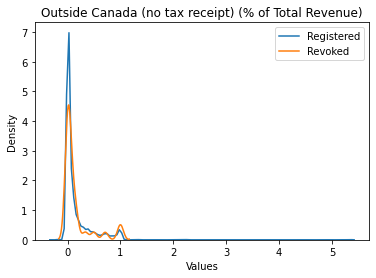

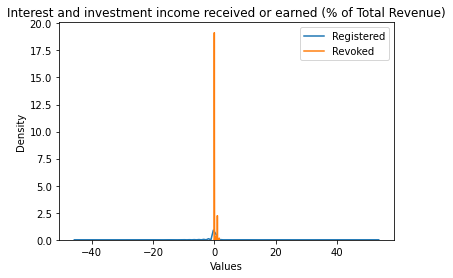

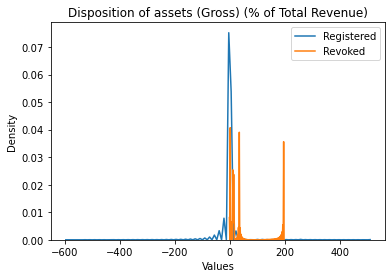

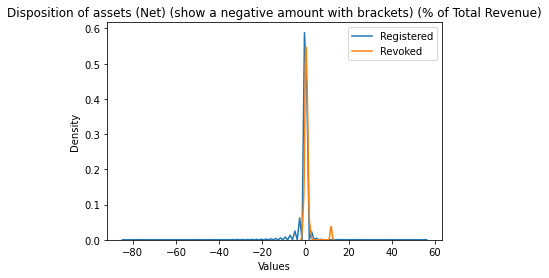

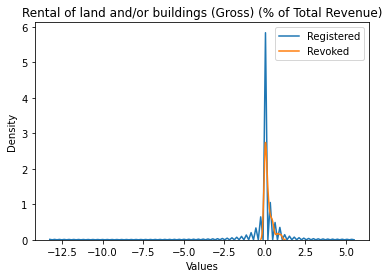

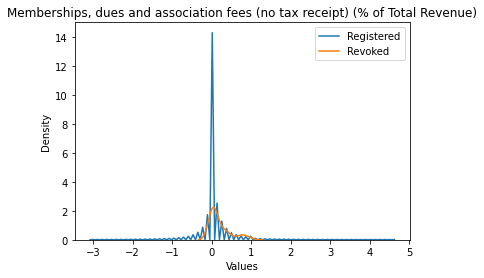

E:\Projects\canadacharities\envs\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


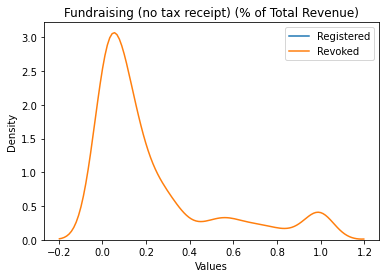

E:\Projects\canadacharities\envs\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


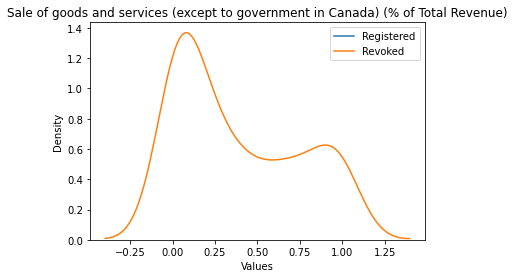

E:\Projects\canadacharities\envs\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


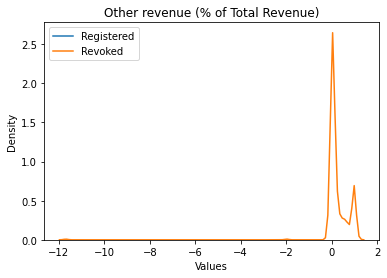

In [182]:
for col in revenue_data.select_dtypes(include='number').columns:
    fig, ax = plt.subplots()
    sns.kdeplot(revenue_data.loc[revenue_data['Status']=='Registered', col], ax=ax, label='Registered')
    sns.kdeplot(revenue_data.loc[revenue_data['Status']=='Revoked', col], ax=ax, label='Revoked')
    plt.legend()
    ax.set_title(data_dic.loc[data_dic['column_name']==col.split('_')[0], 'description'].values[0] + " (% of Total Revenue)")
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')
    plt.show()

In [147]:
'''
df['all'] = ''

for col in revenue_data:
    title = data_dic.loc[data_dic['column_name']==col, 'description'].values[0]
    
    #remove outliers beyond 3 std devs
    not_outliers = removeOutliers(df[col])
    
    ax = sns.violinplot(x='all',y=col, hue='Status', data=df.iloc[not_outliers,:], split=True)
    ax.set_xlabel('')
    ax.set_ylabel(col.replace("_", " "))
    ax.set_title(col + ': ' + title, size=15)
    plt.show()
'''

IndexError: index 0 is out of bounds for axis 0 with size 0

In [199]:
revenue_agg = pd.melt(revenue_data,id_vars=['Status'],var_name='category',value_name='perc_of_revenue') \
    .replace([np.inf, -np.inf], np.nan) \
    .groupby(['Status','category']).mean().reset_index()

DataError: No numeric types to aggregate

In [60]:
#how many report on total revenue? total expenditures?
df[['4700','5100']].isna().sum(axis=0) / df[['4700', '5100']].count()

#looks like 95% report on total revenue & expenditures

4700    0.048224
5100    0.046746
dtype: float64

In [201]:
revenue_agg = pd.melt(revenue_data,id_vars=['Status'],var_name='category',value_name='perc_of_revenue') \
    .replace([np.inf, -np.inf], np.nan) \
    .groupby(['Status','category']).mean().reset_index()
#make barplot with category as x axis & avg perc as y axis


DataError: No numeric types to aggregate

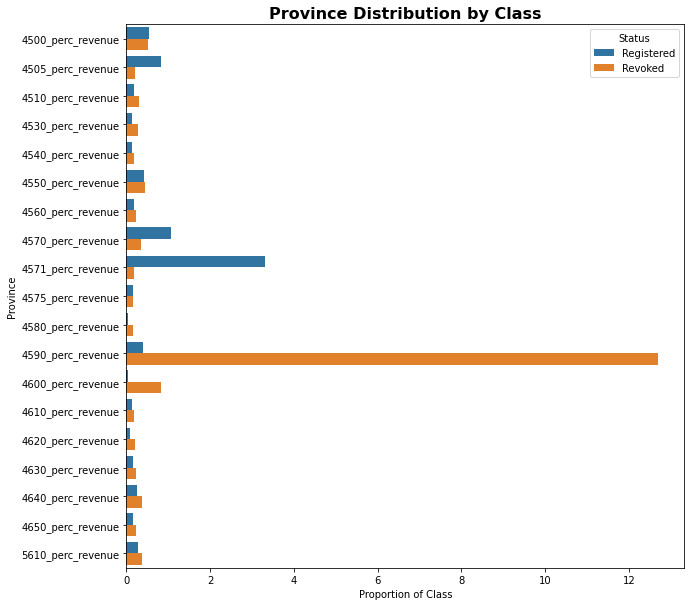

In [144]:
plt.figure(figsize=[10,10])

sns.barplot(x='perc_of_revenue', y='category', hue='Status', data=revenue_agg)
#plt.xticks(rotation=90)
plt.ylabel('Province')
plt.xlabel('Proportion of Class')
plt.title('Province Distribution by Class', fontsize = 16, fontweight='bold')
plt.show();

In [22]:
expenditure_cols = [col for col in df.columns if '_perc_expenditure' in col]

In [ ]:
plt.figure(figsize=[10,10])
cat_df = df.groupby(['Status','Category'])['BN/Registration Number'].agg(['count'])
cat_df['category_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
cat_df = cat_df['category_perc'].reset_index().sort_values(['Status', 'category_perc'], ascending=False)

sns.barplot(x='category_perc', y='Category', hue='Status', data=cat_df)
plt.xticks(rotation=90)
plt.ylabel('Category')
plt.xlabel('Proportion of Class')
plt.title('Category Distribution by Class', fontsize = 16, fontweight='bold')
plt.show();

Q: Why do some columns show negative values? Is this a data entry error?

See columns:

- 4100
- 4530
- 4650
- 4820

In [ ]:
'''
#bivariate plotting

#regression between two variables
sns.set(font='DejaVu Sans')
sns.jointplot([x col], [y col], df, kind='reg').fig.suptitle('y col Regression', y=1.01)

sns.lmplot([x col], [y col], df, col='Status').fig.suptitle('y col Regression - categorized by Status', y=1.05)
'''